In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
!pip3 -q install ipympl

In [22]:
from google.colab import output
output.enable_custom_widget_manager()

In [23]:
%matplotlib widget

# TUTORIAL 2 : Evolute of curves

The evolute of a curve is by definition the set of its centers of curvatures. The goal of this lab session is to define a generic function that computes the evolute of any parameterized curve.

## PART I.
We assume in the following that we have a parametrized curve $f:[a,b]\to\mathbb{R}^3$ which is only known through a discretization $(t,f)$ where $$\textit{t = np.linspace(0,1,n)}\quad f=(f(t_0),\cdots,f(t_{n-1})).$$
$f$ is therefore of size $3 \times n$.

## 1) Discrete derivative
Define a function that calculate an approximation of the derivative of $f$. The output has the same size than $t$ and $f$.

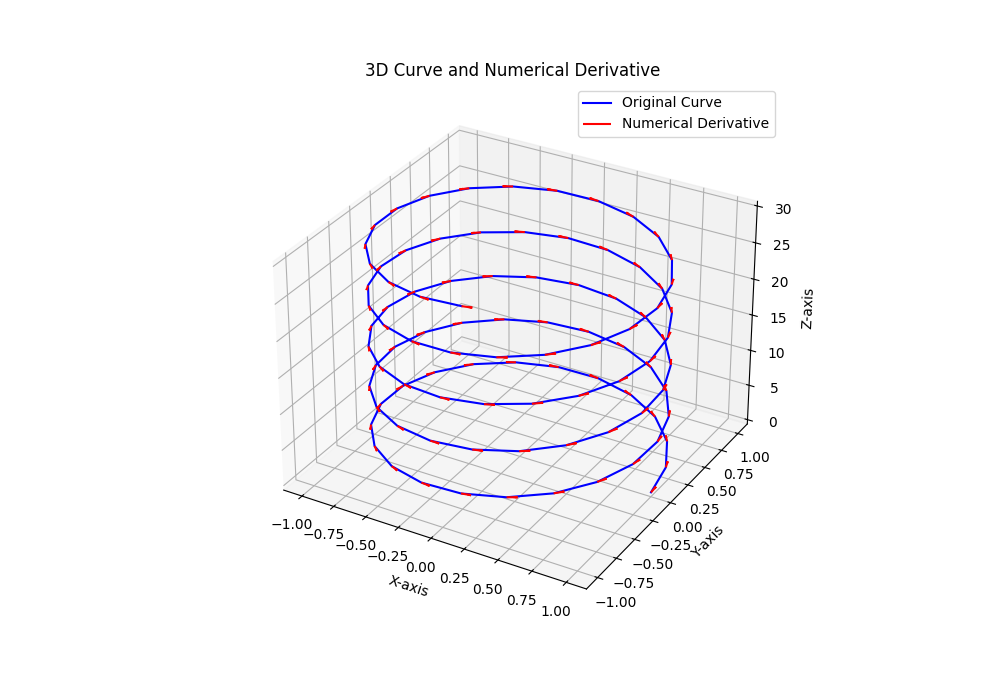

In [24]:
# Function to calculate discrete derivative using finite differences
def derivative(t, f):
    dt = t[1] - t[0]  # Uniform spacing in t
    n = f.shape[1]
    deriv_f = np.zeros_like(f)

    # Second-order central difference for inner points
    for i in range(1, n - 1):
        deriv_f[:, i] = (f[:, i + 1] - f[:, i - 1]) / (2 * dt)

    # Forward difference for the first point
    deriv_f[:, 0] = (-3 * f[:, 0] + 4 * f[:, 1] - f[:, 2]) / (2 * dt)

    # Backward difference for the last point
    deriv_f[:, n - 1] = (3 * f[:, n - 1] - 4 * f[:, n - 2] + f[:, n - 3]) / (2 * dt)

    # Set values near zero to exactly zero
    deriv_f[np.abs(deriv_f) < 1e-10] = 0
    return deriv_f

# ---------------------
# Testing the function on a simple example

# Define time variable and 3D curve f(t)
t = np.linspace(0, 30, 100)
f = np.array([np.cos(t), np.sin(t), t])  # Sample 3D curve
df = np.array([-np.sin(t), np.cos(t), np.ones(len(t))])  # Exact derivative for comparison

# Compute numerical derivative
deriv_f = derivative(t, f)

# Plot original curve and numerical derivative
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(f[0], f[1], f[2], label="Original Curve", color='blue')
ax.quiver(f[0], f[1], f[2], deriv_f[0], deriv_f[1], deriv_f[2], length=0.1, normalize=True, color='red', label="Numerical Derivative")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Curve and Numerical Derivative")
ax.legend()
ax.grid(True)
plt.show()

# Let us calculate Tangent vector

## 2) Discrete normal vector
The goal is to build the function that outputs for every $t_i$ the unit normal $N(t_i)$.

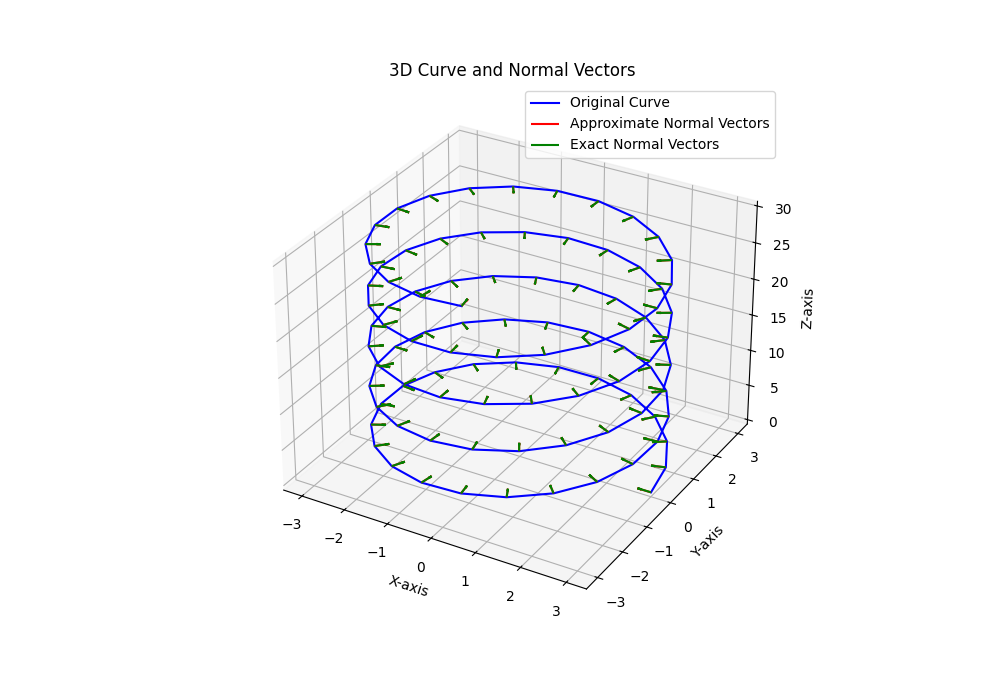

In [25]:
# ----------------------
# Function to calculate the discrete normal vector using finite differences
def normal_vector(t, f):
    deriv_f = derivative(t, f)  # First derivative (tangent vectors)
    tangent = deriv_f / np.linalg.norm(deriv_f, axis=0)  # Normalize tangent vectors

    derif_tangent = derivative(t, tangent)  # Derivative of the tangent vectors
    normal_f = derif_tangent / np.linalg.norm(derif_tangent, axis=0)  # Normalize normal vectors

    return normal_f

# ---------------------
# Check the function on a simple example

# Define the time variable and a 3D curve
t = np.linspace(0, 30, 100)
f = np.array([3 * np.cos(t), 3 * np.sin(t), t])  # Helical 3D curve

# Define the exact normal vector for comparison
n_real = np.array([-np.cos(t), -np.sin(t), np.zeros(len(t))])  # Exact normal vectors

# Calculate the approximate normal vectors
n_approx = normal_vector(t, f)

# 3D Plotting of the curve and normal vectors
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D curve
ax.plot(f[0], f[1], f[2], label="Original Curve", color='blue')

# Plot approximate normal vectors
ax.quiver(
    f[0], f[1], f[2],  # Base points
    n_approx[0], n_approx[1], n_approx[2],  # Normal vector components
    length=0.3, normalize=True, color='red', label="Approximate Normal Vectors"
)

# Plot exact normal vectors
ax.quiver(
    f[0], f[1], f[2],  # Base points
    n_real[0], n_real[1], n_real[2],  # Normal vector components
    length=0.3, normalize=True, color='green', label="Exact Normal Vectors"
)

# Labels, title, and legend
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Curve and Normal Vectors")
ax.legend()
ax.grid(True)

plt.show()

## 3) Curvature function
The goal is to build the function that outputs for every $t_i$ the curvature $k(t_i)$.

In [26]:
# ----------------------
# Function to calculate the curvature of a 3D curve using finite differences
def curvature(t, f):
    # Calculate first and second derivatives
    deriv_f = derivative(t, f)
    double_deriv_f = derivative(t, deriv_f)

    # Calculate the norm of the first derivative for normalization
    norm_by_column = np.linalg.norm(deriv_f, axis=0)

    # Initialize curvature array
    curvature_f = np.zeros(len(t))

    # Compute curvature at each point
    for i in range(len(t)):
        # Calculate the cross product of the first and second derivatives
        cross_product = np.cross(deriv_f[:, i], double_deriv_f[:, i])
        # Compute curvature using the formula
        curvature_f[i] = np.linalg.norm(cross_product) / norm_by_column[i]**3

    return curvature_f

# ---------------------
# Testing the curvature function on a simple example

t = np.linspace(0, 30, 100)
f = np.array([3 * np.cos(t), 3 * np.sin(t), t])  # Sample 3D curve
cur_real = np.full(len(t), 3 / 10)

curvature_f = curvature(t, f)

print("Calculated Curvature:", curvature_f)
print("Expected Curvature:", cur_real)

Calculated Curvature: [0.28000758 0.30264212 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752 0.29906752
 0.29906752 0.29906752 0.29906752 0.2990

## 4) Evolute
Define the evolute, namely the set of centers of curvatures.

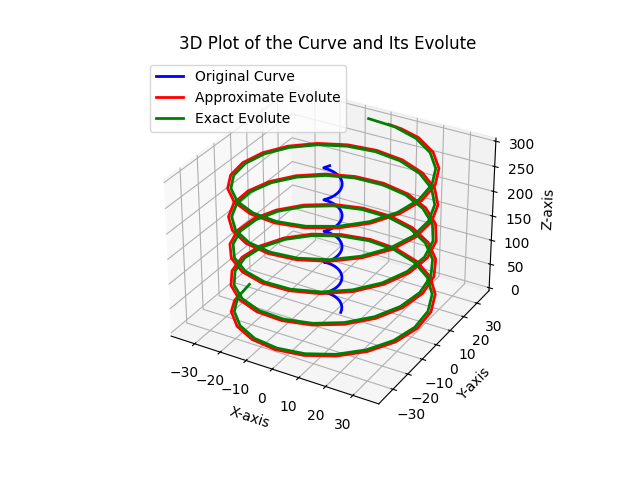

In [27]:
# ----------------------
# Function to calculate the evolute of a 3D curve
def evolute(t, f):
    normal_vec = normal_vector(t, f)
    curvature_val = curvature(t, f)
    curvature_val[curvature_val == 0] = 1e-10
    return f + normal_vec / curvature_val

# ---------------------
# Testing the evolute function on a simple example

t = np.linspace(0, 30, 100)
f = np.array([3 * np.cos(t), 3 * np.sin(t), 10 * t])  # Sample 3D curve
evo_approx = evolute(t, f)
evo_exact = np.array([-100 * np.cos(t) / 3, -100 * np.sin(t) / 3, 10 * t])  # Exact evolute

# Plotting with matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original curve
ax.plot(f[0], f[1], f[2], label='Original Curve', color='blue', linewidth=2)

# Plot the approximate evolute
ax.plot(evo_approx[0], evo_approx[1], evo_approx[2], label='Approximate Evolute', color='red', linewidth=2)

# Plot the exact evolute
ax.plot(evo_exact[0], evo_exact[1], evo_exact[2], label='Exact Evolute', color='green', linewidth=2)

# Labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Plot of the Curve and Its Evolute')

# Show legend and plot
ax.legend()
plt.show()

## PART II. 1) Evolute of the helicoid
Plot the evolute of the helicoid
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^3\\
&t &\mapsto & (R\cos t, R \sin t, at).
\end{array}
$$

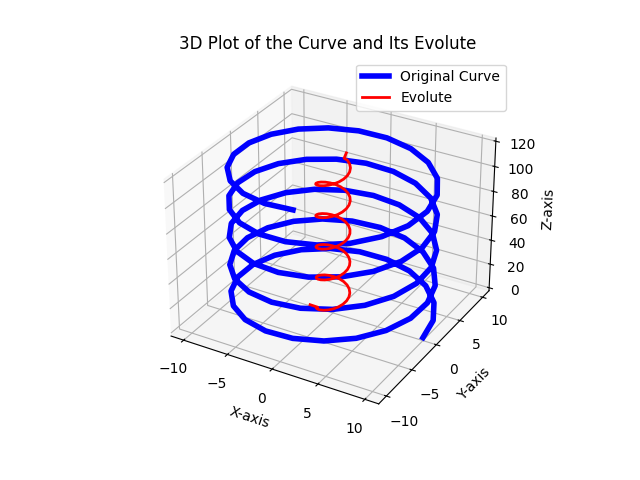

In [33]:
# Define the time variable and the 3D curve
t = np.linspace(0, 30, 100)
R = 10
a = 4
f = np.array([R * np.cos(t), R * np.sin(t), a * t])

# Calculate the normal vector and evolute for the curve
norm = normal_vector(t, f)
evo = evolute(t, f)

# ---------------------
# Create the figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original 3D curve
ax.plot(f[0], f[1], f[2], label='Original Curve', color='blue', linewidth=4)

# Plot the evolute of the curve
ax.plot(evo[0], evo[1], evo[2], label='Evolute', color='red', linewidth=2)

# Labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Title of the plot
ax.set_title('3D Plot of the Curve and Its Evolute')

# Show the legend for the curve and evolute
ax.legend()

# Display the plot
plt.show()

## 2) Evolute of the catenary
Plot the evolute of the catenary
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^2\\
&t &\mapsto & (t,\cosh t).
\end{array}
$$

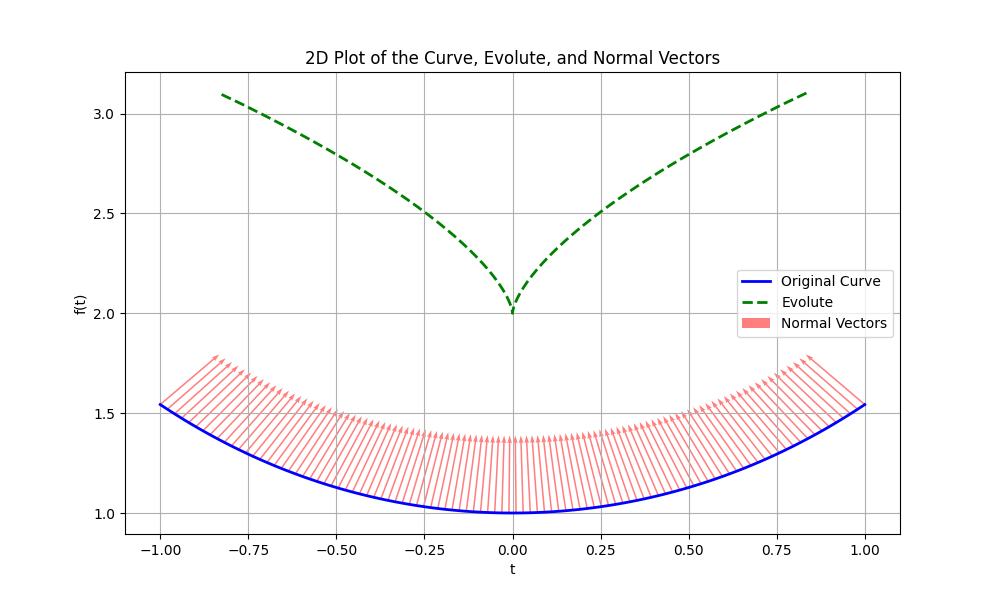

In [32]:
# Define the catenary curve
t = np.linspace(-1, 1, 100)
f = np.array([t, np.cosh(t)])

# Calculate the normal vector for the curve at each point
norm = normal_vector(t, f)

# Calculate the evolute of the catenary curve
evo = evolute(t, f)

# Create a figure for plotting the results
plt.figure(figsize=(10, 6))
plt.plot(f[0], f[1], label="Original Curve", color='blue', linewidth=2)
plt.plot(evo[0], evo[1], label="Evolute", color='green', linestyle='--', linewidth=2)
plt.quiver(f[0], f[1], norm[0], norm[1],
    color='red', scale=10, width=0.002, alpha=0.5, label="Normal Vectors")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("2D Plot of the Curve, Evolute, and Normal Vectors")
plt.legend()
plt.grid(True)
plt.show()

# The irregularity at $ t = 0 $ in the evolute of the catenary curve arises because the curvature at this point is very small, causing the center of curvature to be "infinitely far away." This leads to a sharp turn or "V" shape in the evolute, which is a result of the vanishing curvature at the origin. At this point, the normal vector is horizontal, and the curvature approaches zero, creating the irregularity in the evolute.
